In [1]:
%matplotlib inline

# Exploratory Data Analysis

First of, we are just simply going to load the `"P-370_daily_data.csv"` file and have a look at the heat_units (Growing Degree Days) as a function of time.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

np.set_printoptions(precision=2)

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
p370_df = pd.read_csv("P-370_daily_data.csv", sep=",", header=0, parse_dates=True,
                      index_col=0, na_values="None", date_parser=dateparse)
p370_df.head()

,heat_units,rain,erain,total_irrig,tot_eff_irrig,etc,ety,et0,etcp,rzone,...,days_left,deficit_current,rzm,rzm_source,fcap,profile,deficit_want,refill,et0_forecast_yr,original_unit_system
date,,,,,,,,,,,,,,,,,,,,,
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.82,0.68,6.8,0.0,500,...,30.0,4.57,128.93,software,133.5,0.0,40,80.1,1.15,si
2017-08-02,0.0,1.0,0.0,0.0,0.0,0.82,0.68,6.8,0.0,500,...,30.0,5.39,128.11,software,133.5,0.0,40,80.1,1.24,si
2017-08-03,0.0,0.2,0.0,0.0,0.0,0.82,0.68,6.8,0.0,500,...,30.0,6.21,127.29,software,133.5,0.0,40,80.1,1.23,si
2017-08-04,0.0,0.0,0.0,0.0,0.0,0.82,0.68,6.8,0.0,500,...,30.0,7.03,126.47,software,133.5,0.0,40,80.1,1.92,si
2017-08-05,0.0,0.0,0.0,0.0,0.0,0.82,0.68,6.8,0.0,500,...,30.0,7.85,125.65,software,133.5,0.0,40,80.1,1.74,si


In [4]:
p370_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2017-08-01 to 2019-02-01
Data columns (total 21 columns):
 heat_units              550 non-null float64
 rain                    550 non-null float64
 erain                   550 non-null float64
 total_irrig             550 non-null float64
 tot_eff_irrig           550 non-null float64
 etc                     550 non-null float64
 ety                     550 non-null float64
 et0                     550 non-null float64
 etcp                    550 non-null float64
 rzone                   550 non-null int64
 available               550 non-null float64
 days_left               550 non-null float64
 deficit_current         550 non-null float64
 rzm                     550 non-null float64
 rzm_source              550 non-null object
 fcap                    550 non-null float64
 profile                 550 non-null float64
 deficit_want            550 non-null int64
 refill                  550 non-null float64
 et0_fo

In [5]:
p370_df.describe()

,heat_units,rain,erain,total_irrig,tot_eff_irrig,etc,ety,et0,etcp,rzone,available,days_left,deficit_current,rzm,fcap,profile,deficit_want,refill,et0_forecast_yr
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.0,550.000000,550.000000,550.000000,550.000000,550.0,550.000000,550.000000,550.000000,550.000000
mean,6.127273,3.281091,1.027455,1.240545,0.886127,1.648782,12.172982,5.574364,3.281018,500.0,30.498600,10.409055,12.512673,120.987327,133.5,217.287564,32.218182,90.488727,3.221818
std,4.208461,13.083497,4.062032,3.019169,2.136955,1.143680,19.682593,1.520235,44.698005,0.0,24.501977,12.646878,19.337231,19.337231,0.0,81.601833,8.545796,11.408638,1.639706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.010000,0.710000,-172.100000,500.0,-21.640000,-9.240000,-43.750000,81.730000,133.5,0.000000,20.000000,80.100000,0.000000
25%,2.500000,0.000000,0.000000,0.000000,0.000000,0.650000,1.610000,4.632500,-9.027500,500.0,9.025000,0.770000,-2.130000,103.662500,133.5,179.912500,20.000000,80.100000,1.752500
50%,7.400000,0.000000,0.000000,0.000000,0.000000,1.300000,4.420000,6.510000,-1.110000,500.0,32.415000,2.925000,6.485000,127.015000,133.5,239.560000,35.000000,86.775000,3.265000
75%,8.950000,0.200000,0.000000,0.000000,0.000000,2.900000,14.920000,6.510000,2.292500,500.0,53.792500,27.747500,29.837500,135.630000,133.5,269.122500,40.000000,106.800000,4.647500
max,17.650001,157.200000,25.000000,16.000000,11.200000,4.000000,123.780000,8.000000,274.570000,500.0,97.150000,30.000000,51.770000,177.250000,133.5,475.720000,40.000000,106.800000,7.280000


In [6]:
p370_df.iloc[:, 0].replace(0, np.nan, inplace=True)
missing_data = p370_df.iloc[:, 0].isna().sum()
missing_data_perc = (missing_data / len(p370_df.index)) * 100
print("There are {:.0f}% missing data points for the heat_units column.".format(missing_data_perc))
print("This is equivalent to {:.0f} out of {:.0f} data points that are missing.".format(missing_data, len(p370_df)))

There are 16% missing data points for the heat_units column.
This is equivalent to 89 out of 550 data points that are missing.


<class 'datetime.date'>


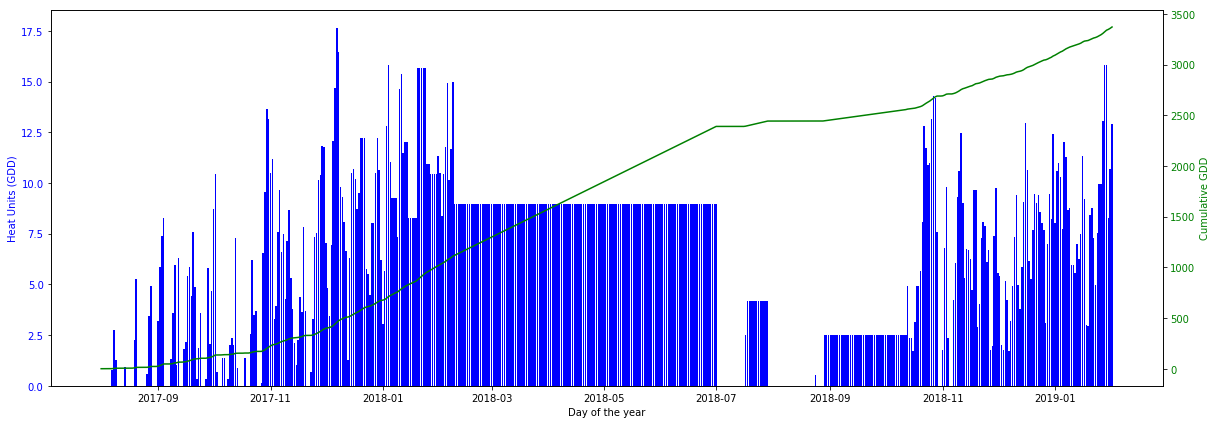

In [7]:
heat_units = np.asarray(p370_df.iloc[:, 0])  # all the rows, but the first column
cumul_gdd1 = np.nancumsum(heat_units, dtype=np.float64)
indep = np.array(p370_df.index.date)
print(type(indep[0]))

fig, ax1 = plt.subplots()
fig.set_size_inches(17, 6, forward=True)

color = "blue"
ax1.set_xlabel('Day of the year')
ax1.set_ylabel('Heat Units (GDD)', color=color)
ax1.bar(indep, heat_units, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color="green"
ax2.set_ylabel("Cumulative GDD", color=color)
ax2.plot(indep, cumul_gdd1, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()

# How to handle the missing data?

From hereon onwards, I will try to interpolate the missing data in the heat_units dataset with the:  
`method="nearest"`  
approach.

In [8]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
p370_df = pd.read_csv("P-370_daily_data.csv", sep=",", header=0, parse_dates=True,
                      index_col=0, na_values="None", date_parser=dateparse)
p370_df.iloc[:, 0].replace(0, np.nan, inplace=True)

In [9]:
s = pd.Series(p370_df.iloc[:, 0])
print("Number of non-NaN data points BEFORE INTERPOLATION: {}.".format(s.count()))
s = s.interpolate(method="nearest")
print("Number of non-NaN data points AFTER INTERPOLATION with the 'nearest' method: {}.".format(s.count()))
s.fillna(method="bfill", inplace=True)  # fill values that are still missing at the beginning
print("Number of non-NaN data points after interpolation with 'bfill' method: {}.".format(s.count()))
# s.fillna(method="ffill", inplace=True)  # fill values that are still missing at the end

Number of non-NaN data points BEFORE INTERPOLATION: 461.
Number of non-NaN data points AFTER INTERPOLATION with the 'nearest' method: 544.
Number of non-NaN data points after interpolation with 'bfill' method: 550.


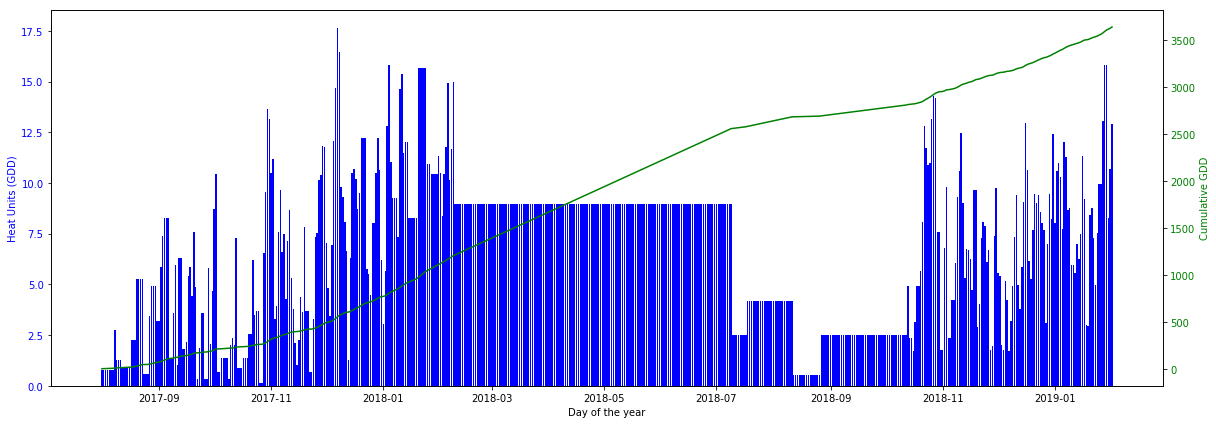

In [10]:
heat_units = np.array(s)
cumul_gdd2 = np.nancumsum(heat_units, dtype=np.float64)
indep = np.array(p370_df.index.date)  # returns a numpy array of python datetime.date objects (namely, the date part of Timestamps without timeone information).


fig, ax1 = plt.subplots()
fig.set_size_inches(17, 6, forward=True)

color = "blue"
ax1.set_xlabel('Day of the year')
ax1.set_ylabel('Heat Units (GDD)', color=color)
ax1.bar(indep, heat_units, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color="green"
ax2.set_ylabel("Cumulative GDD", color=color)
ax2.plot(indep, cumul_gdd2, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()

# Comparison of the two cumulative GDD curves

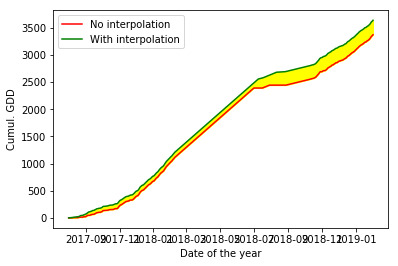

In [11]:
plt.plot(indep, cumul_gdd1, color="red", label="No interpolation")
plt.plot(indep, cumul_gdd2, color="green", label="With interpolation")
plt.fill_between(indep, cumul_gdd1, cumul_gdd2, color="yellow")
plt.xlabel("Date of the year")
plt.ylabel("Cumul. GDD")
plt.legend()
plt.show()